### **Buscar el time series más corto**

In [2]:
min_samples = 832

### **Hacer reshape de todos los experimentos a tener 832 (Todos los time series)**

In [11]:
import numpy as np
import pandas as pd
from glob import glob
from scipy import signal

size = 832
files = glob('Z:\Descargas\composite\CSV_DATA\*.csv')
for file in files:
    df = pd.read_csv(file)
    col_names = ('Flow rate', 'Pressure')    
    cols = [col for col in df if col.endswith(col_names)]    
    resampled_df = pd.DataFrame(signal.resample(df[cols], min_samples), columns=cols)
    resampled_df['TOTAL_QUALITY'] = df['TOTAL_QUALITY']
    resampled_df.to_csv(file.replace('CSV_DATA', 'deepl\CSV_DATA_RESAMPLED'), index=False)

### **Generar dataset de train (10% de los correctos concatenados uno debajo del otro)**

In [12]:
import numpy as np
import pandas as pd
from glob import glob

files = glob('Z:\Descargas\composite\deepl\CSV_DATA_RESAMPLED\*.csv')
np.random.shuffle(files)

n_files = int(len(files) * 0.1) # 10% de los datos correctos

df_list = []

for file in files:
    df = pd.read_csv(file)
    if df.iloc[:,-1][0] == 1:
        df_list.append(df)
    if len(df_list) == n_files:
        break
        
print(len(df_list))

1001


In [15]:
df = pd.concat(df_list)
df = df.iloc[:,:-1]
df

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.380212e-07,2409.355141,2861.887520,3085.917071,3276.710716,3473.095380,3750.290855,2722.364183,2919.948290,3048.801960,...,3166.720090,3142.077099,3117.057552,3089.325473,3144.507417,3159.953634,3110.588334,3058.034283,2983.540303,2817.945501
1,7.368338e-07,-829.671745,-978.836603,-1055.754988,-1120.089089,-1180.573629,-1268.479899,-937.752523,-1001.811993,-1047.166009,...,-1083.740368,-1065.184665,-1052.984812,-1039.665236,-1079.675267,-1073.583207,-1045.273515,-1023.785142,-1003.587575,-949.665467
2,7.265200e-07,465.682684,546.616778,590.407605,626.179301,655.855378,700.714917,528.283454,561.735509,588.286359,...,607.002602,589.884116,580.681813,570.726690,606.818662,595.868884,572.526074,558.253750,550.493392,522.144953
3,9.220886e-07,-313.897545,-366.808527,-396.984105,-420.980765,-437.915170,-464.925505,-357.897122,-378.648269,-397.507474,...,-409.070756,-392.530678,-384.576486,-376.024013,-410.215380,-397.365162,-376.204565,-364.989946,-362.378853,-344.639799
4,1.067952e-06,232.275468,270.285850,293.219125,310.930831,321.041439,338.467864,266.359865,280.322852,295.128153,...,303.001032,286.746997,279.455892,271.650622,304.623579,290.856850,270.960893,261.429446,261.562338,249.498176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-1.315394e-08,47768.068956,50404.322615,50459.986202,48734.847617,44253.910526,38157.076843,66578.380581,56113.411290,54432.196148,...,56448.227165,50940.298049,45011.530767,41649.831104,55216.856141,64563.768962,72439.210608,63784.104251,55213.062928,45860.589558
828,1.485221e-08,47338.855302,49989.259358,50095.481985,48430.427770,44061.919101,38119.295795,65893.401157,55583.702885,53968.396690,...,56029.188951,50637.406159,44838.370990,41555.881767,54674.486265,63930.249388,71732.219092,63249.105926,54844.257402,45684.028085
829,-1.726380e-08,48187.778487,50969.576064,51179.820425,49589.003174,45342.595009,39553.129856,66905.450534,56543.578784,54980.283488,...,57155.473960,51770.873489,45952.690714,42638.110681,55602.068774,65004.556195,72931.136701,64399.351181,55931.477999,46641.076326
830,2.108744e-08,47468.715955,50292.737446,50611.104377,49138.677583,45133.135230,39669.127620,65745.744011,55666.256984,54221.918675,...,56467.453956,51284.425183,45676.332277,42476.703890,54718.994112,63962.304911,71753.633455,63497.319501,55287.375488,46257.426336


In [17]:
df.to_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv')

### **Normalizar los datos con StandardScaler**

In [80]:
import pandas as pd

train = pd.read_csv('Z:\\Descargas\\composite\\deepl\\train_correct.csv', index_col=0)
train.shape

(832832, 29)

In [81]:
train

,Flow rate,Zone2_Pressure,Zone3_Pressure,Zone4_Pressure,Zone5_Pressure,Zone6_Pressure,Zone7_Pressure,Zone9_Pressure,Zone10_Pressure,Zone11_Pressure,...,Zone21_Pressure,Zone22_Pressure,Zone23_Pressure,Zone24_Pressure,Zone26_Pressure,Zone27_Pressure,Zone28_Pressure,Zone29_Pressure,Zone30_Pressure,Zone31_Pressure
0,6.380212e-07,2409.355141,2861.887520,3085.917071,3276.710716,3473.095380,3750.290855,2722.364183,2919.948290,3048.801960,...,3166.720090,3142.077099,3117.057552,3089.325473,3144.507417,3159.953634,3110.588334,3058.034283,2983.540303,2817.945501
1,7.368338e-07,-829.671745,-978.836603,-1055.754988,-1120.089089,-1180.573629,-1268.479899,-937.752523,-1001.811993,-1047.166009,...,-1083.740368,-1065.184665,-1052.984812,-1039.665236,-1079.675267,-1073.583207,-1045.273515,-1023.785142,-1003.587575,-949.665467
2,7.265200e-07,465.682684,546.616778,590.407605,626.179301,655.855378,700.714917,528.283454,561.735509,588.286359,...,607.002602,589.884116,580.681813,570.726690,606.818662,595.868884,572.526074,558.253750,550.493392,522.144953
3,9.220886e-07,-313.897545,-366.808527,-396.984105,-420.980765,-437.915170,-464.925505,-357.897122,-378.648269,-397.507474,...,-409.070756,-392.530678,-384.576486,-376.024013,-410.215380,-397.365162,-376.204565,-364.989946,-362.378853,-344.639799
4,1.067952e-06,232.275468,270.285850,293.219125,310.930831,321.041439,338.467864,266.359865,280.322852,295.128153,...,303.001032,286.746997,279.455892,271.650622,304.623579,290.856850,270.960893,261.429446,261.562338,249.498176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-1.315394e-08,47768.068956,50404.322615,50459.986202,48734.847617,44253.910526,38157.076843,66578.380581,56113.411290,54432.196148,...,56448.227165,50940.298049,45011.530767,41649.831104,55216.856141,64563.768962,72439.210608,63784.104251,55213.062928,45860.589558
828,1.485221e-08,47338.855302,49989.259358,50095.481985,48430.427770,44061.919101,38119.295795,65893.401157,55583.702885,53968.396690,...,56029.188951,50637.406159,44838.370990,41555.881767,54674.486265,63930.249388,71732.219092,63249.105926,54844.257402,45684.028085
829,-1.726380e-08,48187.778487,50969.576064,51179.820425,49589.003174,45342.595009,39553.129856,66905.450534,56543.578784,54980.283488,...,57155.473960,51770.873489,45952.690714,42638.110681,55602.068774,65004.556195,72931.136701,64399.351181,55931.477999,46641.076326
830,2.108744e-08,47468.715955,50292.737446,50611.104377,49138.677583,45133.135230,39669.127620,65745.744011,55666.256984,54221.918675,...,56467.453956,51284.425183,45676.332277,42476.703890,54718.994112,63962.304911,71753.633455,63497.319501,55287.375488,46257.426336


In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler().fit(train)
train = scaler.transform(train)
train.shape

(832832, 29)

### Definir modelo LSTM-AutoEncoder

In [83]:
# reshape input into [samples, timesteps, features]

n_samples = 1001
n_steps = 832
n_features = train.shape[1]
train = train.reshape((n_samples, n_steps, n_features))

train.shape

(1001, 832, 29)

In [84]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.LSTM(16, activation='relu', return_sequences=True, input_shape=(train.shape[1], train.shape[2])),
    layers.LSTM(8, activation='relu', return_sequences=False),
    layers.RepeatVector(train.shape[1]),
    layers.LSTM(8, activation='relu', return_sequences=True),
    layers.LSTM(16, activation='relu', return_sequences=True),
    layers.TimeDistributed(layers.Dense(train.shape[2]))
])

model.compile(optimizer='adam', loss='mae')
history = model.fit(train, train, epochs=5, batch_size=64, validation_split=0.1)

Train on 900 samples, validate on 101 samples
Epoch 1/5
900/900 [==============================] - 30s 34ms/sample - loss: 0.1637 - val_loss: 0.1515
Epoch 2/5
900/900 [==============================] - 27s 30ms/sample - loss: 0.1508 - val_loss: 0.1424
Epoch 3/5
900/900 [==============================] - 27s 30ms/sample - loss: 0.1430 - val_loss: 0.1349
Epoch 4/5
900/900 [==============================] - 27s 30ms/sample - loss: 0.1340 - val_loss: 0.1252
Epoch 5/5
900/900 [==============================] - 28s 31ms/sample - loss: 0.1247 - val_loss: 0.1178


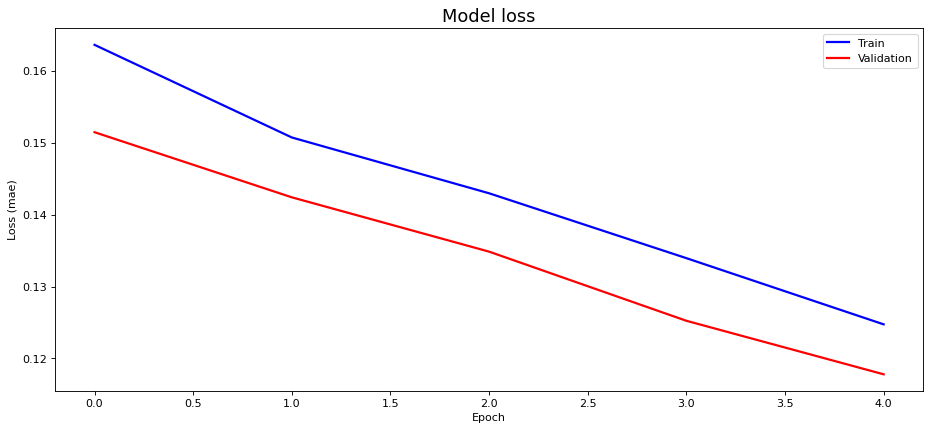

In [85]:
from matplotlib import pyplot as plt

# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()